<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 2 / NOTE 1*

# 📝 Assignment

# 가설 검정

## 1. One-Sample T-test 연습

### 데이터 불러오기
- [서울시 가로수 데이터셋](https://data.seoul.go.kr/dataList/367/S/2/datasetView.do)을 사용합니다.

다음 링크를 참조하세요. 
<https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/seoul_tree/seoul_tree.txt>


In [ ]:
# !sudo pip3 install --upgrade scipy

In [ ]:
import pandas as pd

# data = pd.read_csv('파일경로', sep = "\t", , engine='python', encoding = "인코딩방식")
data = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/seoul_tree/seoul_tree.txt', sep = "\t", engine='python', header= 1)
data = data.replace({'-':0})

### "서울시에는 구별로 평균 약 400 그루 정도의 `이팝나무`가 있다"라는 가설에 대해 가설검정을 시행하세요.

- 단, `서울시`, `공원녹지사업소`, `시설관리공단` 부분의 데이터는 제외합니다.
- 가설검정 결과의 pvalue 값을 `pv1`에 저장하세요. (`.pvalue` 사용)

In [ ]:
tree_epop = data[['자치구', '이팝나무']].drop([data.index[0], data.index[26], data.index[27]])
tree_epop['이팝나무'] = pd.to_numeric(tree_epop['이팝나무'].str.replace(',', ''))

from scipy import stats
result = stats.ttest_1samp(tree_epop['이팝나무'], 400)
pv1 = result[1]
result
# 이 곳에 답안을 작성하시기 바랍니다

Ttest_1sampResult(statistic=3.3809205562101288, pvalue=0.002470712850935819)

### 이번에는 10개의 구를 샘플링하여, 위에 대한 가설검정을 다시 한번 시행해보세요.

- 단, 아래의 코드를 참조하여 sample을 위한 seed 는 123로 설정하세요.
- 가설검정 결과의 pvalue값을 `pv2`에 저장하세요


In [ ]:
import numpy as np
np.random.seed(123)

result2 = stats.ttest_1samp(np.random.choice(tree_epop['이팝나무'], size = 10), 400)  # "~"와 " "을 적절한 값으로 채우시면 됩니다
pv2 = result2[1]
result2

Ttest_1sampResult(statistic=0.706555193453698, pvalue=0.49772576203804575)

## 2. Two-Sample T-test 연습

### "서울시의 구별 평균 느티나무수와 왕벚나무의 수는 차이가 없다"라는 가설에 대해 가설검정을 시행하세요.

- 단, `서울시`, `공원녹지사업소`, `시설관리공단` 부분의 데이터는 제외합니다.
- 가설검정 결과의 pvalue를 `pv3`에 저장하세요

In [ ]:
two_sample = data[['자치구', '느티나무', '왕벚나무']].drop([data.index[0], data.index[26], data.index[27]])
two_sample['느티나무'] = pd.to_numeric(two_sample['느티나무'].str.replace(',', ''))
two_sample['왕벚나무'] = pd.to_numeric(two_sample['왕벚나무'].str.replace(',', ''))

# result3 = stats.ttest_ind(two_sample['느티나무'], two_sample['왕벚나무'], alternative='two-sided') 
result3 = stats.ttest_ind(two_sample['느티나무'], two_sample['왕벚나무'])
pv3 = result3[1]
result3
# 이 곳에 답안을 작성하시기 바랍니다

Ttest_indResult(statistic=0.4629256014492562, pvalue=0.6455096880085703)


### Two-Sample One-tailed test를 사용하여 **평균 느티나무수가 왕벚나무 수보다 크다**라는 가설에 대한 가설검정을 시행하세요.
- 해당 가설검정의 결과를 `ans`에 저장하세요.

이 때 `ans`가 가질 수 있는 값은 아래와 같습니다 :
1. "느티나무" ( 느티나무의 수가 통계적으로 유의하게 많은 경우 )
2. "왕벚나무" ( 왕벚나무의 수가 통계적으로 유의하게 많은 경우 )
3. "없음" (통계적으로 유의하지 않은 경우)

다음 링크를 참조하세요.
<https://stackoverflow.com/questions/15984221/how-to-perform-two-sample-one-tailed-t-test-with-numpy-scipy>

In [ ]:
from scipy import stats

# 평균 느티나무 수가 평균 왕벚나무 수보다 크다
stats.ttest_ind(two_sample['느티나무'], two_sample['왕벚나무'], alternative = 'greater')
if pv3 < 0.005:
  ans = 1
else:
  ans = 3
# 평균 왕벚나무 수가 평균 느티나무수보다 크다
stats.ttest_ind(two_sample['왕벚나무'], two_sample['느티나무'], alternative = 'greater')
if pv3 < 0.005:
  ans = 2
else:
  ans = 3

ans
# 이 곳에 답안을 작성하시기 바랍니다

3

In [ ]:
round(pv1, 4)

0.0025

In [ ]:
round(pv2, 4)

0.4977

In [ ]:
round(pv3, 4)

0.6455

In [ ]:
ans

3

## 🔥 **도전과제**
> 3문제 모두 하면 됩니다.



### 1. Compare mean for multiple-sample 
 
다음 링크를 참조하세요. <https://reneshbedre.github.io/blog/anova.html>

구별, 은행나무, 양버즘나무, 느티나무에 대해서 ANOVA Test를 실행하세요.

단, `서울시`, `공원녹지사업소`, `시설관리공단` 부분의 데이터는 제외합니다.

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

import matplotlib as mpl
#그래프의 한글을 더욱 선명하게 출력 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

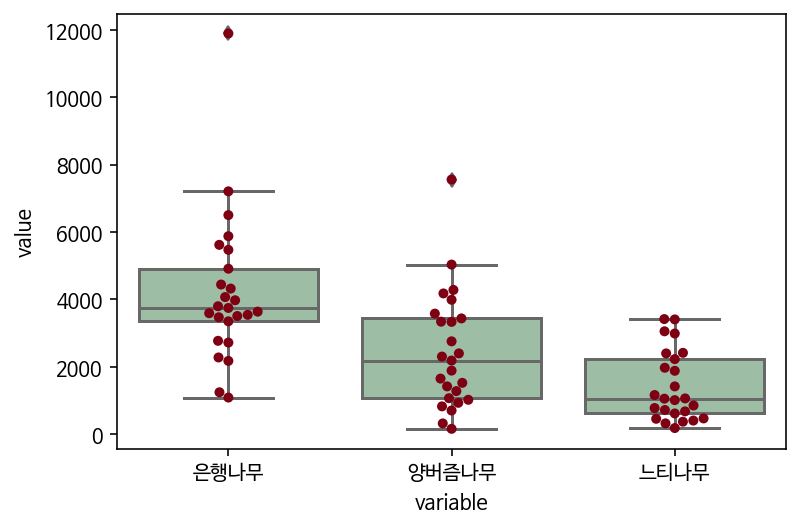

F_onewayResult(statistic=17.006289557888046, pvalue=8.935183167883698e-07)

In [ ]:
df_ch = data[['자치구', '은행나무', '양버즘나무', '느티나무']].drop([data.index[0],data.index[26], data.index[27]])
df_ch['은행나무'] = pd.to_numeric(df_ch['은행나무'].str.replace(',', ''))
df_ch['양버즘나무'] = pd.to_numeric(df_ch['양버즘나무'].str.replace(',', ''))
df_ch['느티나무'] = pd.to_numeric(df_ch['느티나무'].str.replace(',', ''))
df_melt = pd.melt(df_ch.reset_index(), id_vars=['자치구'], value_vars=['은행나무', '양버즘나무', '느티나무'])
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='variable', y='value', data=df_melt, color='#99c2a2');
ax = sns.swarmplot(x="variable", y="value", data=df_melt, color='#7d0013');
plt.show()

# 일원 분산 분석 (ANOVA Test)
stats.f_oneway(df_ch['은행나무'], df_ch['양버즘나무'], df_ch['느티나무'])
# 이 곳에 답안을 작성하시기 바랍니다

### 2. Sampling

- 세션 시간에 배웠던 4가지 sample 방식을 구현해보세요.

- 이를 위한 데이터는 1 부터 100 이며, sampling해야 하는 수는 20개 입니다.

- Stratified random sampling을 위한 그룹을 나누는 기준은 1-10, 11-20, ... 과 같은 방식입니다.

- Cluster sampling 을 위한 그룹을 나누는 기준은 5로 나눴을때의 나머지 값입니다. (0,1,2,3,4)

In [ ]:
sample_data = range(100)
# Effective Sampling
# 1. Simple random sampling
np.random.randint(1,101,20)

array([48, 74, 33, 47, 97, 26, 84, 79, 37, 97, 81, 69, 50, 56, 68,  3, 85,
       40, 67, 85])

In [ ]:
# 2. Systematic sampling
rand = np.random.randint(1, 5, 1)[0]
[rand + 5*i for i in range(20)]

[4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 89, 94, 99]

In [ ]:
# 3. Stratified random sampling
df_Stratified = pd.DataFrame({'data': range(1, 101), 'group': np.repeat([i for i in range(1,11)],10).tolist()})
df_Stratified.sample(20)

,data,group
97,98,10
88,89,9
47,48,5
2,3,1
4,5,1
32,33,4
74,75,8
99,100,10
36,37,4
0,1,1


In [ ]:
# 4. Cluster sampling
df_Cluster = pd.DataFrame({'data': range(1, 101), 'group': [i % 5 for i in range(1, 101)]})
df_Cluster.sample(20)

,data,group
86,87,2
47,48,3
38,39,4
12,13,3
79,80,0
73,74,4
30,31,1
49,50,0
39,40,0
20,21,1


### 3. Data transform
다음 링크를 참조하여  `Inverse transform sampling` 을 구현합니다.

<https://youtu.be/9ixzzPQWuAY>

0 ~ 1 의 값을 동일한 확률로 갖는 `uniform distribution`으로 부터 `binomial distribution`으로 transform 하는 코드를 작성한 뒤, 두가지 결과를 시각화를 통해 비교하세요.

Inverse transform sampling = 역변환 셈플링

uniform distribution = 연속균등분포

binomial distribution = 이항 분포

In [ ]:
# 이 곳에 답안을 작성하시기 바랍니다

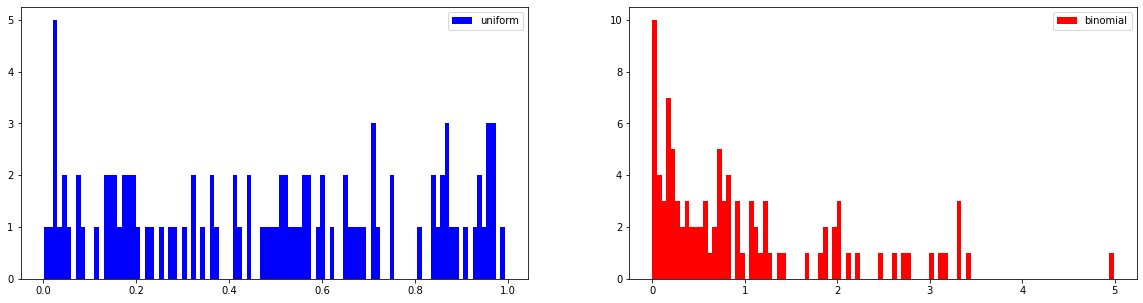

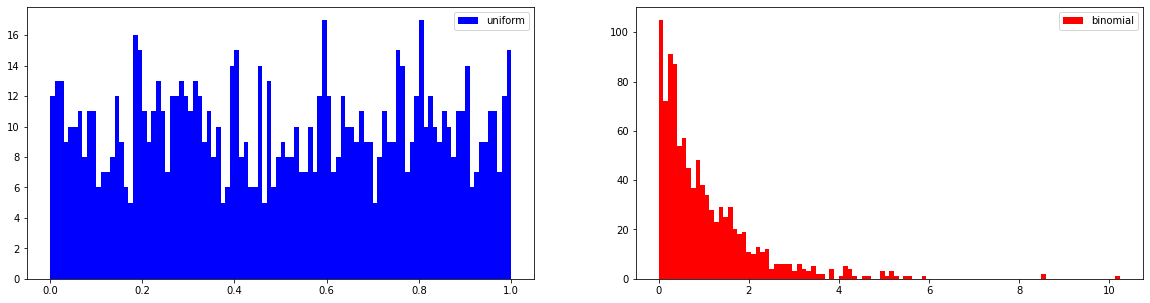

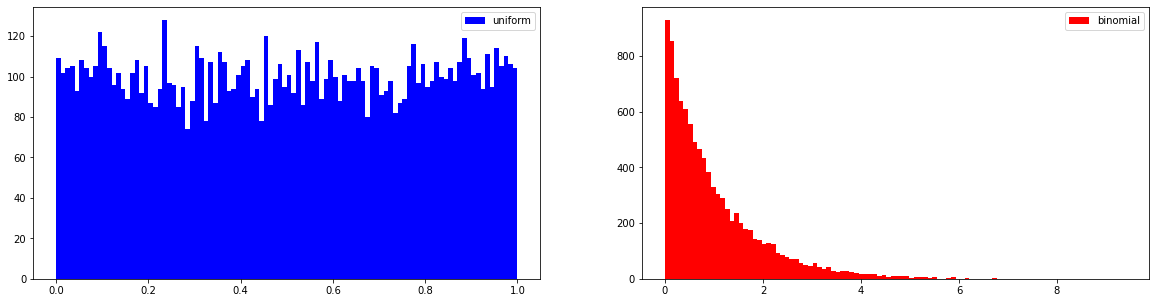

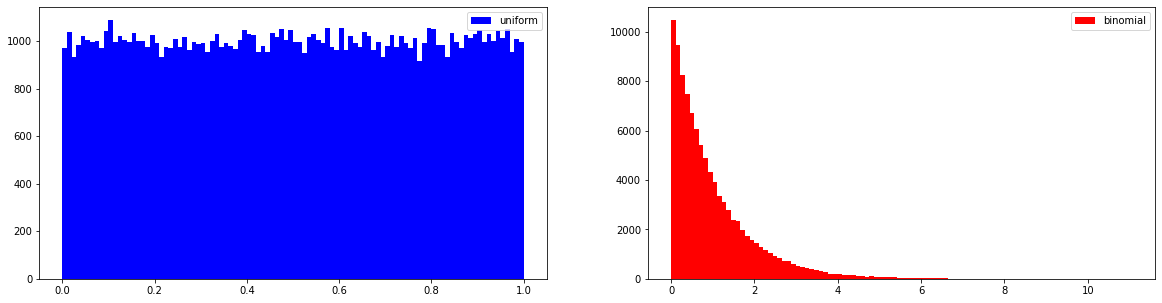

In [ ]:
def Inverse_transform_sampling(n):
  import numpy as np
  uni = np.random.uniform(low=0, high=1, size=n)
  bin = (-np.log(1-uni)) / 1 
  import matplotlib.pyplot as plt
  fig, ax = plt.subplots(1, 2, figsize=(20, 5))
  # 연속 균등 분포 : 0 ~ 1 사이에 랜덤한 값을 추출 하다보면 size가 커질수록 균등하게 나올 확률이 증가한다.
  ax[0].hist(uni, label = 'uniform', color = 'b', bins = 100);
  ax[0].legend()
  # 역변환 ! x = (-log(1-u)) / lambda
  ax[1].hist(bin, label = 'binomial', color = 'r',  bins = 100);
  ax[1].legend()
  plt.show()

Inverse_transform_sampling(100)
Inverse_transform_sampling(1000)
Inverse_transform_sampling(10000)
Inverse_transform_sampling(100000)

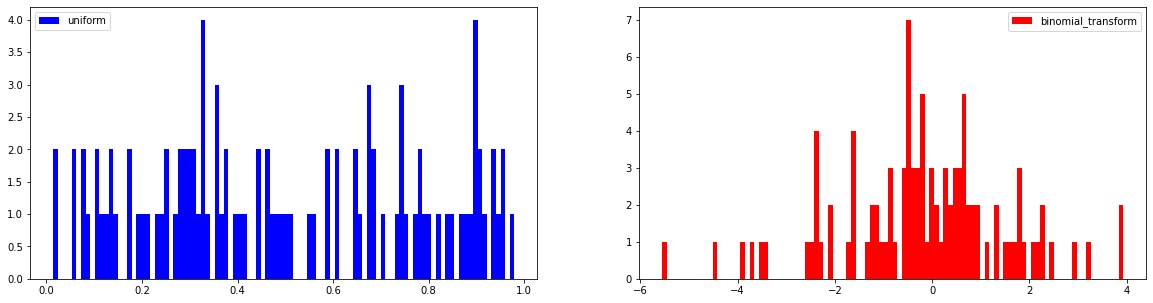

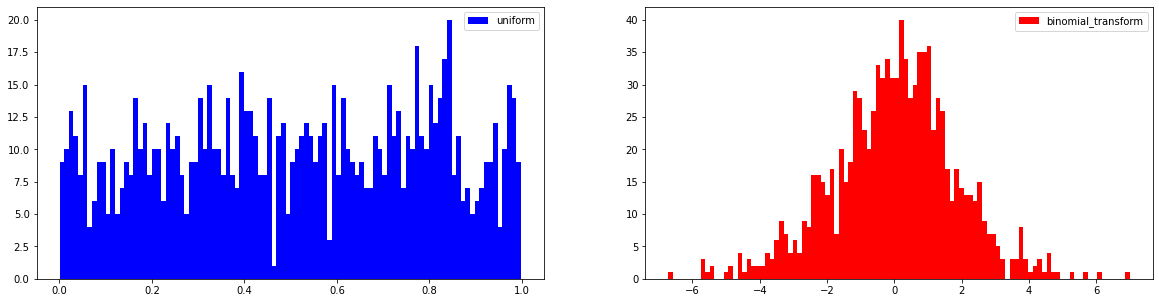

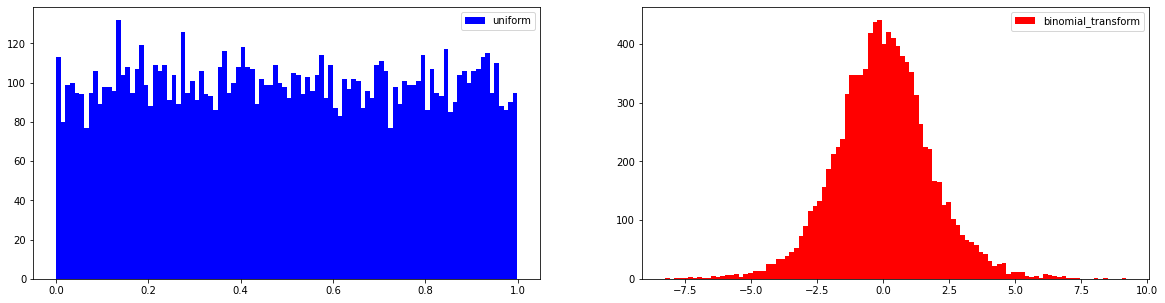

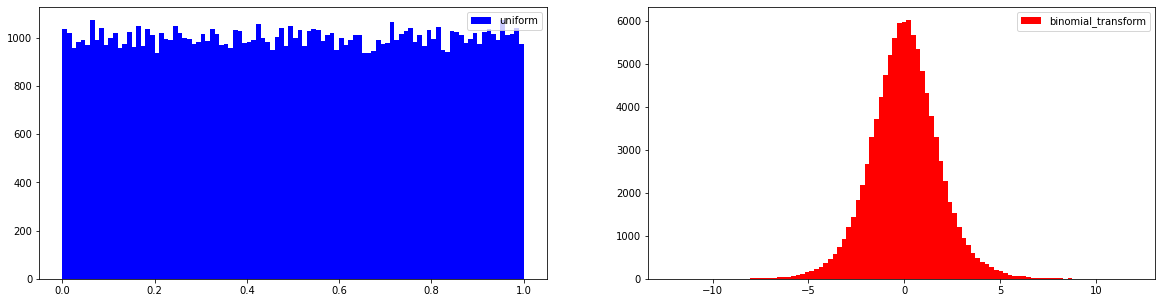

In [ ]:
# 연속 균등 분포
def uniform_distribution(n):
  import numpy as np
  uni = np.random.uniform(low=0, high=1, size=n)
  return uni
# 난수 생성
def inv_cdf(u):
    return np.log(u /(1 - u))
# 이항 분포
def binomial_distribution(uni):
  binomial_distribution = [inv_cdf(uni_num) for uni_num in uni]
  return binomial_distribution


def img_uni_bin(n):
  import matplotlib.pyplot as plt
  fig, ax = plt.subplots(1, 2, figsize=(20, 5))
  # 연속 균등 분포
  ax[0].hist(uniform_distribution(n), label = 'uniform', color = 'b', bins = 100);
  ax[0].legend()
  # 이항 분포 
  ax[1].hist(binomial_distribution(uniform_distribution(n)), label = 'binomial_transform', color = 'r', bins = 100);
  ax[1].legend()

img_uni_bin(100)
img_uni_bin(1000)
img_uni_bin(10000)
img_uni_bin(100000)